# EDA dla zbioru z problemem klasyfikacji płci w zależności od własności akustycznych głosu #

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats
import sklearn
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Wszystkie nasze zmienne objaśniające są numeryczne, w dodatku w żadnej z nich nie mamy braków danych, co niewątpliwie ułatwi nam pracę. Cech jest aż 20. Dane pochodzą z analizy częstotliwości dźwięku generowanego przez głosy kobiet i mężczyzn. Zbiór obfituje w 3168 obserwacji.

In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Pierwszym ważnym spostrzeżeniem jest to, że dla każdej zmiennej mamy dokładnie wszystkie wartości różne, co oznacza brak zmiennych dyskretnych, przypuszczamy, że każda z nich będzie miała pewien rozkład ciągły. Większość tych zmiennych jest statystykami wygenerowanymi na podstawie nagrań głosów poszczególnych osób, stąd musimy uważać na (niekoniecznie unikać)  tworzenie statystyk z innych statystyk, takich jak średnia ze średnich. Może to prowadzić do nieścisłości, gdyż nie mamy dostępu do początkowych próbek. Zmienne mają w większości dość małe zakresy, mieszczą się między 0 a 1. Jedynie zmienna **kurt** przyjmuje istotnie większe wartości, spróbujemy znaleźć tutaj jakieś przekształcenie tej zmiennej. Duże wartości maksymalne mają również zmienne **skew**, **maxdom** i **dfrange**, tutaj możemy mieć do czynienia z obserwacjami odstającymi, stąd zwrócimy uwagę na te zmienne. Reszta zmiennych na pierwszy rzut oka nie zdradza nic podejrzanego, wartości kwartyli oraz zakresy wydają się w porządku.

In [6]:
np.max(abs(df.Q75-df.Q25-df.IQR))

1.0000000549847954e-09

**IQR**=**Q75**-**Q25**, zatem powinniśmy pozbyć się tej zmiennej, bo da się ją wyliczyć z pozostałych.

In [7]:
df = df.drop(columns="IQR")

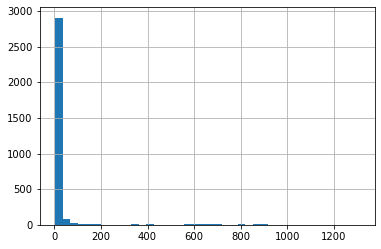

In [8]:
df['kurt'].hist(bins=40)

Spróbujmy przekształcić tą zmienną przy użyciu funkcji log(x).

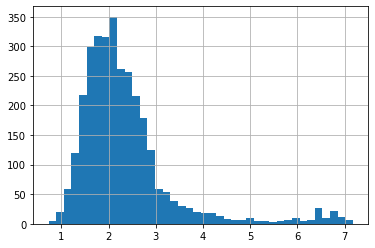

In [9]:
np.log(df['kurt']).hist(bins=40)

Przekształcenie to zadziałało całkiem nieźle, mamy już dużo mniejsze wartości. Dalej jednak mamy rozkład z bardzo dużym ogonem prawostronnym. Zobaczymy jak zadziała kolejne przekształcenie log(x). 

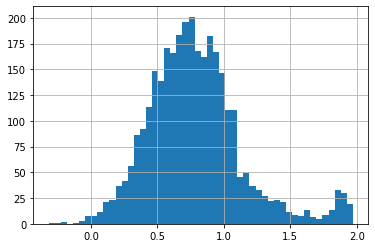

In [10]:
np.log(np.log(df['kurt'])).hist(bins=50)

Tak przekształcona zmienna **kurt** ma wartości bardzo podobne do innych zmiennych, a jej histogram przypomina bardzo gęstość rozkładu normalnego. Jedyną rzeczą, która to psuje jest dużo wartości większych od około 1.75. Moga to być wartości odstające, co zaraz sprawdzimy przy użyciu reguły trzech sigm.

In [11]:
df['kurt']=np.log(np.log(df['kurt']))

In [12]:
mean_kurt=np.mean(df['kurt'])
std_kurt=np.std(df['kurt'])
print("Liczba obserwacji odstających: ",np.sum(abs(df['kurt']-mean_kurt)>3*std_kurt))
print("Odsetek obserwacji odstających: ",np.sum(abs(df['kurt']-mean_kurt)>3*std_kurt)/len(df["kurt"]))

Liczba obserwacji odstających:  71
Odsetek obserwacji odstających:  0.02241161616161616


Mamy 71 obserwacji odstających, co wydaje się być ewentualną sporą utratą danych, jednak w porównaniu do całego zbioru jest to jedynie niecałe 2.5% obserwacji. 

<div class=text-justify>
Do tej pory udało nam się zidentyfikować zmienne, które potencjalnie przekazywały tą samą informację. W celu dalszej analizy występowania współliniowości posłużymy się narzędziem z analizy regresji, a mianowicie współczynnikiem podbicia wariancji (VIF). <br/>
W skrócie każdą ze zmiennych z naszej ramki eksperymentu będziemy w kolejnych krokach traktować jako zmienną objaśnianą i z pomocą metody najmniejszych kwadratów dokonywać rzutu tego wektora na podprzestrzeń stworzoną z pozostałych zmiennych w ramce danych. Dzięki statystyce $R^2$, mówiącej jaka część zmienności zmiennej objaśnianej w danej iteracji może być wytłumaczona zmiennością reszty zmiennych będziemy mogli skonstruować VIF. <br/>
Wartości powyżej 10 będą intuicyjnie świadczyły o występowaniu stochastycznej współliniowości. Wartości powyżej 100 będą świadczyły, że pozostałe zmienne w zbiorze w 99% tłumaczą zmienność danej cechy. Wartośc równa inf będzie świadczyła o tym, że zmienna jest kombinacją liniową pozostałych zmiennych. <br/>
Prosty wzór przedstawia się następująco : $$VIF_i = \frac{1}{1-R_i^2}$$. 
</div>

In [13]:
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = df.iloc[:, list(range(0,19))].columns 
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, list(range(0,19))].values, i) 
                          for i in range(len(df.iloc[:, list(range(0,19))].columns))] 
print(vif_data)

     feature           VIF
0   meanfreq  3.607208e+12
1         sd  2.378420e+02
2     median  4.407674e+02
3        Q25  2.092979e+02
4        Q75  1.596158e+03
5       skew  5.240596e+00
6       kurt  1.822943e+01
7     sp.ent  5.850425e+02
8        sfm  5.534098e+01
9       mode  1.440166e+01
10  centroid  5.829902e+12
11   meanfun  3.558988e+01
12    minfun  6.631470e+00
13    maxfun  1.190049e+02
14   meandom  1.308394e+01
15    mindom           inf
16    maxdom           inf
17   dfrange           inf
18   modindx  5.939156e+00


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Zmienne **mindom**, **maxdom**, **dfrange** są liniowo zależne z pewnym zestawem pozostałych zmiennych w zbiorze. Zmienne takie jak **centroid**, **meanfreq** wykazują pewną dozę współliniowości z pozostałymi zmiennymi, potencjalnie może, ale nie musi rodzić to potem problemy przy modelowaniu. 

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.322327,-0.283038,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.314597,0.165443,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.257407,-0.259664,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.319475,-0.154582,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,-0.206339,-0.330737,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,1.000000,0.744673,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.283038,0.165443,-0.259664,-0.154582,-0.330737,0.744673,1.000000,-0.255203,0.041476,-0.478002,-0.283038,-0.051196,-0.241025,-0.156625,-0.375120,0.047374,-0.343217,-0.344178,0.044127
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,-0.195459,-0.255203,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.079694,0.041476,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477
mode,0.687715,-0.529150,0.677433,0.591277,0.486857,-0.434859,-0.478002,-0.325298,-0.485913,1.000000,0.687715,0.324771,0.385467,0.172329,0.491479,0.198150,0.477187,0.473775,-0.182344


In [15]:
corr = df.corr(method="spearman")
corr.style.background_gradient(cmap='coolwarm')

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.724087,0.909119,0.876783,0.708111,-0.125411,-0.213868,-0.660895,-0.817716,0.681909,1.000000,0.499246,0.480189,0.459835,0.562347,0.354253,0.565749,0.558066,-0.276223
sd,-0.724087,1.000000,-0.538268,-0.830148,-0.126654,-0.068850,0.029408,0.768086,0.871441,-0.423403,-0.724087,-0.489878,-0.405045,-0.234480,-0.482068,-0.450612,-0.501382,-0.490192,0.178746
median,0.909119,-0.538268,1.000000,0.726494,0.721690,-0.138689,-0.216451,-0.545338,-0.675870,0.709003,0.909119,0.453696,0.415673,0.433240,0.469889,0.293738,0.467979,0.461771,-0.249434
Q25,0.876783,-0.830148,0.726494,1.000000,0.402132,0.097763,0.003122,-0.730460,-0.791678,0.514621,0.876783,0.649583,0.367069,0.318802,0.457246,0.389209,0.483947,0.473885,-0.179654
Q75,0.708111,-0.126654,0.721690,0.402132,1.000000,-0.329062,-0.359057,-0.195941,-0.379059,0.566036,0.708111,0.153421,0.337483,0.435580,0.372890,0.088414,0.343565,0.344509,-0.231652
skew,-0.125411,-0.068850,-0.138689,0.097763,-0.329062,1.000000,0.980423,-0.400628,-0.113715,-0.311122,-0.125411,0.115023,-0.202224,-0.213277,-0.298263,0.026439,-0.252271,-0.257337,0.040045
kurt,-0.213868,0.029408,-0.216451,0.003122,-0.359057,0.980423,1.000000,-0.277149,-0.005777,-0.379298,-0.213868,0.045603,-0.258896,-0.244467,-0.349430,-0.025614,-0.306444,-0.309940,0.077826
sp.ent,-0.660895,0.768086,-0.545338,-0.730460,-0.195941,-0.400628,-0.277149,1.000000,0.890744,-0.326493,-0.660895,-0.500735,-0.353188,-0.211148,-0.298621,-0.360402,-0.344477,-0.333510,0.285041
sfm,-0.817716,0.871441,-0.675870,-0.791678,-0.379059,-0.113715,-0.005777,0.890744,1.000000,-0.458076,-0.817716,-0.463561,-0.425449,-0.307445,-0.445273,-0.383449,-0.475171,-0.465703,0.280857
mode,0.681909,-0.423403,0.709003,0.514621,0.566036,-0.311122,-0.379298,-0.326493,-0.458076,1.000000,0.681909,0.326457,0.433364,0.342745,0.488004,0.269863,0.473547,0.467358,-0.204689


Jak widzimy bardzo duża liczba zmiennych jest ze sobą skorelowana. Będziemy się więc musieli poważnie zastanowić nad usunięciem kilku z nich. 
+ Pierwszą, która rzuca nam się w oczy jest zmienna **centroid**, która jest całkowicie skorelowana dodatnio ze zmienną **meanfreq**, co oznacza, że jest ona prawie na pewno jakąś funkcją liniową **meanfreq**. Dodatkowo ma ona korelację powyżej 0.9 z dwoma innymi zmiennymi, co sprawia, że jest ona idealnym kandydatem do usunięcia. 
+ Kolejną parą o prawie całkowitej dodatniej korelacji są zmienne **maxdom** i **dfrange**. Możemy zatem usunąć dowolną z nich.
+ Okazuje się, że po naszym przekształceniu zmiennej **kurt** jest ona bardzo silnie skorelowana ze **skew**, możemy zatem usunąć **skew**.
+ Zmienna **meanfreq** jest z kolei bardzo silnie skorelowana z **median** i **Q25**. Teoretycznie statystyki te nie muszą być w ogóle ze sobą powiązane, lecz w naszym przypadku bardzo możliwe jest, że **meanfreq** jest kombinacją liniową tych dwóch zmiennych i możemy usunąć ją z modelu.
+ **sfm** jest silnie najskorelowana z **sp.ent** oraz ma pozostałe korelacje dużo mocniejsze od **sp.ent**, zatem możemy się jej pozbyć z naszego zbioru. 
+ Niespodzianką jest silna korelacja ujemna występuje pomiędzy **sd** a **Q25**, jednak przy usunięciu **meanfreq** oraz **centroid** musimy zostawić w naszym zbiorze **Q25**, a możemy usunąć **sd**.

In [16]:
df=df.drop(columns=["centroid","dfrange","meanfreq","sfm","sd","skew"])

Przyjrzyjmy się dokładniej zmiennej **maxdom**.

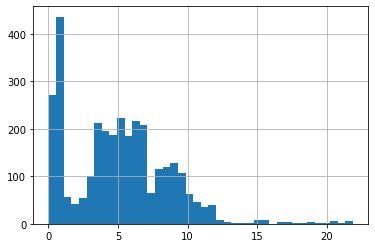

In [17]:
df['maxdom'].hist(bins=40)

Widzimy, że ma ona osobliwy histogram, wygląda na rozkład dwumodalny, prawostronnie skośny. Spróbujmy po raz kolejny zastosować na tej zmiennej przekształcenie logarytmiczne.

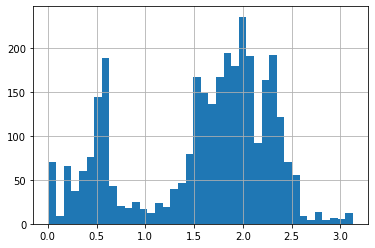

In [18]:
np.log(df['maxdom']+1).hist(bins=40)

Po przekształceniu dalej mamy rozkład dwumodalny, ale pozbyliśmy się prawostronnej skośności. Możemy jeszcze zobaczyć przy pomocy boxplotu jak rozkłada się ta zmienna.

In [19]:
df['maxdom']=np.log(df['maxdom']+1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


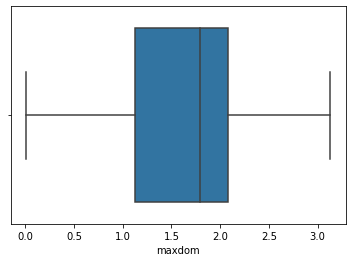

In [20]:
sns.boxplot(df['maxdom'])

Nie mamy zatem podejrzeń o obserwacjach odstających. Możemy zastanowić się nad binaryzacją tej zmiennej na 0 dla wartości mniejszych od 1 i 1 dla wartości większych od 1. Zobaczmy jakie byłyby teoretyczne proporcje obu klas.

In [21]:
print("Liczba obserwacji z klasy 0: ",np.sum(df['maxdom']<=1.1))
print("Liczba obserwacji z klasy 1: ",np.sum(df['maxdom']>1.1))

Liczba obserwacji z klasy 0:  787
Liczba obserwacji z klasy 1:  2381


Proporcje obserwacji w obu klasach wynosiłyby zatem 1:3, więc byłyby całkiem akceptowalne.

Na potrzeby przyszłych analiz zapewne przydałoby się utworzyć pomocniczą zmienną indykatorową, która 1 przypisywałaby obserwacji będącej kobietą, a 0 mężczyzną. 

In [22]:
df["gender"]=0
df.loc[list(np.where(df.label=="female")[0]),"gender"]=1

Powróćmy do współczynnika podbicia wariancji. Jak wyglada liniowa zależność w nowopowstałym zbiorze zmiennych?

In [23]:
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = df.iloc[:, list(range(0,13))].columns 
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, list(range(0,13))].values, i) 
                          for i in range(len(df.iloc[:, list(range(0,13))].columns))] 
print(vif_data)

    feature         VIF
0    median  138.308511
1       Q25   33.067469
2       Q75  242.938603
3      kurt    8.165990
4    sp.ent  181.891815
5      mode   14.195881
6   meanfun   34.052131
7    minfun    6.374808
8    maxfun  114.317181
9   meandom   12.544684
10   mindom    2.199329
11   maxdom   25.818661
12  modindx    5.454448


<div class=text-justify>
Usunęliśmy zmienne, kóre były deterministycznie kombinacją liniową pozostałych zmiennych. Spoglądając na zestawienie 12 cech nadal występuje współliniowość, na przykład patrząc na <b>median </b>, <b>Q75 </b>,  <b>maxfun </b>, <b>sp.ent</b>. Najprawdopodobniej, niektóre z nich niosą tę samą informację co pewne pozostałe zmienne ze zbioru lub ich kombinacje. Jeżeli nie chcemy się już pozbywać żadnej zmiennej powinniśmy pamiętać o tym fakcie analizując macierz kowariancji, może stosować pewne zabiegi regularyzujące przy regresji i ich odpowiedniki dla innych algorytmów.
</div>

Porównajmy teraz histogramy oraz wykresy zależności wszystkich zmiennych w grupach.

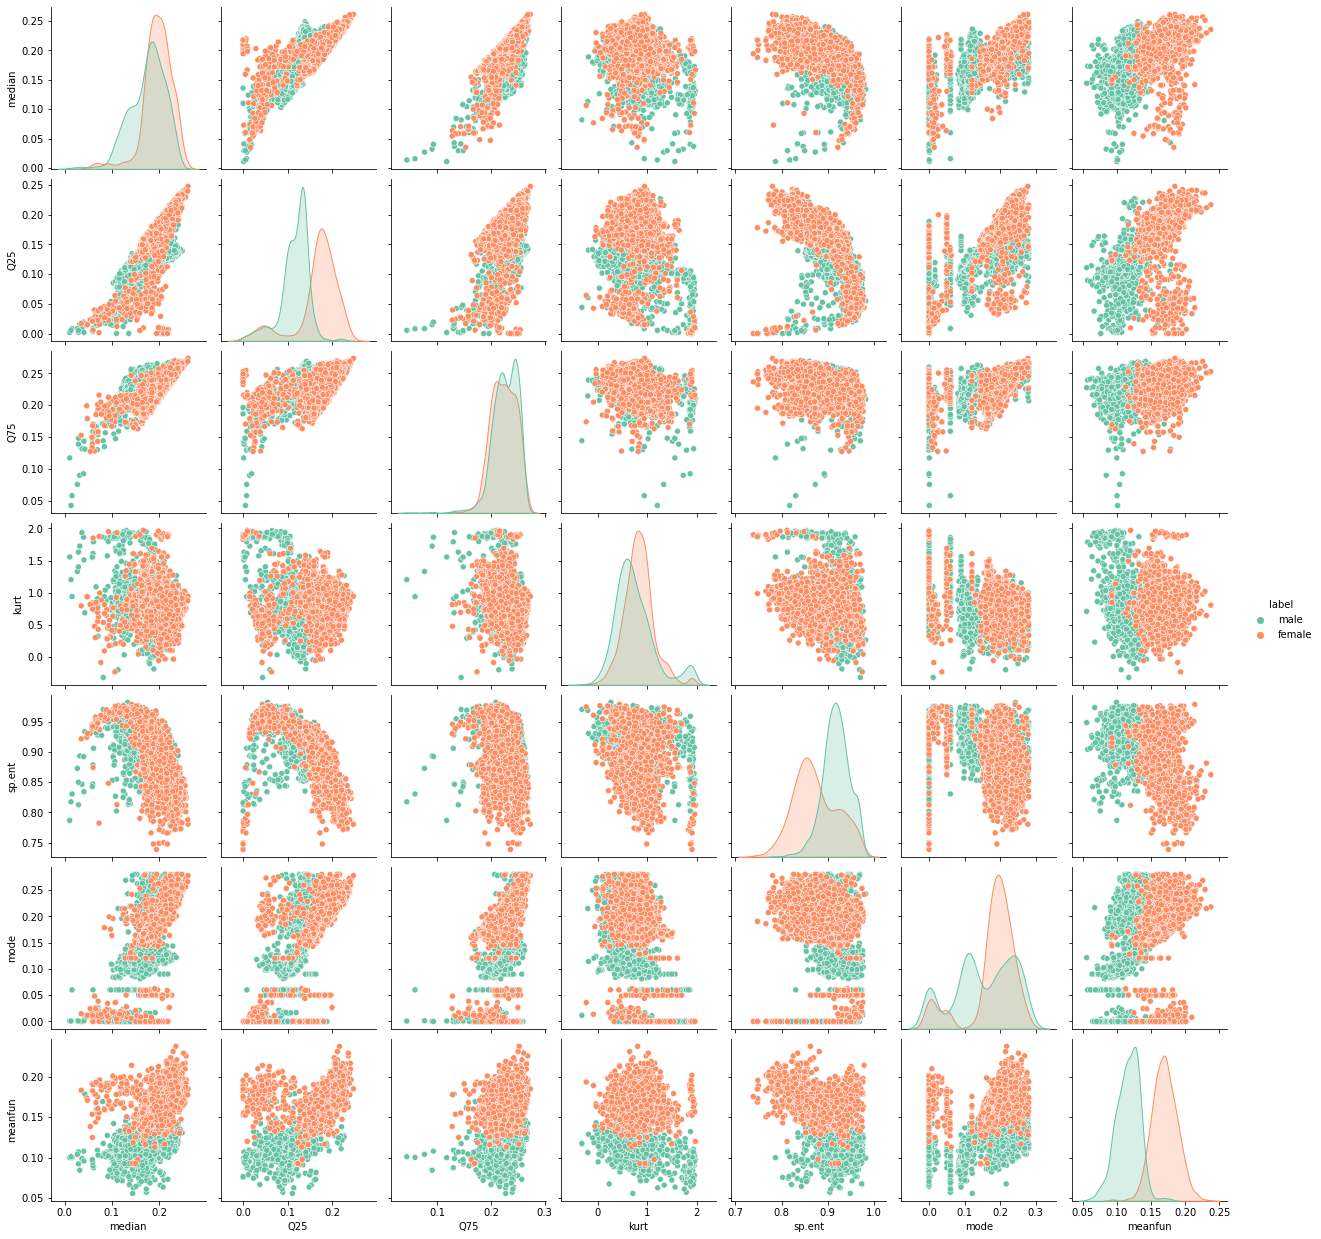

In [24]:
sns.pairplot(df,x_vars=list(df.columns[0:7]),y_vars=list(df.columns[0:7]), kind="scatter", hue="label", palette="Set2")
plt.show()

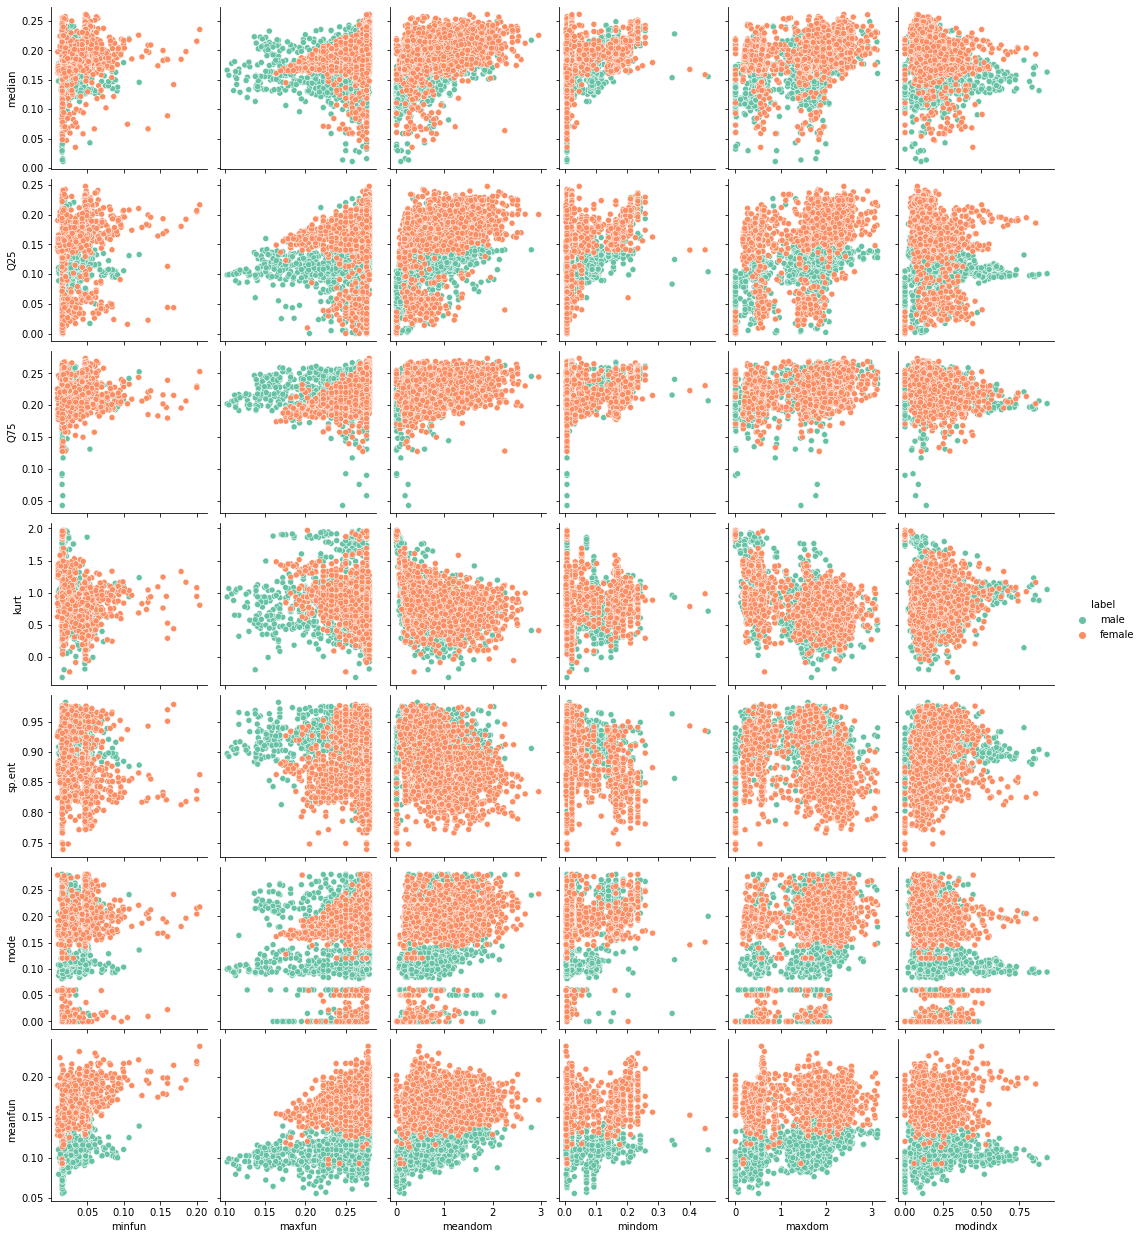

In [25]:
sns.pairplot(df,x_vars=list(df.columns[7:13]),y_vars=list(df.columns[0:7]), kind="scatter", hue="label", palette="Set2")
plt.show()

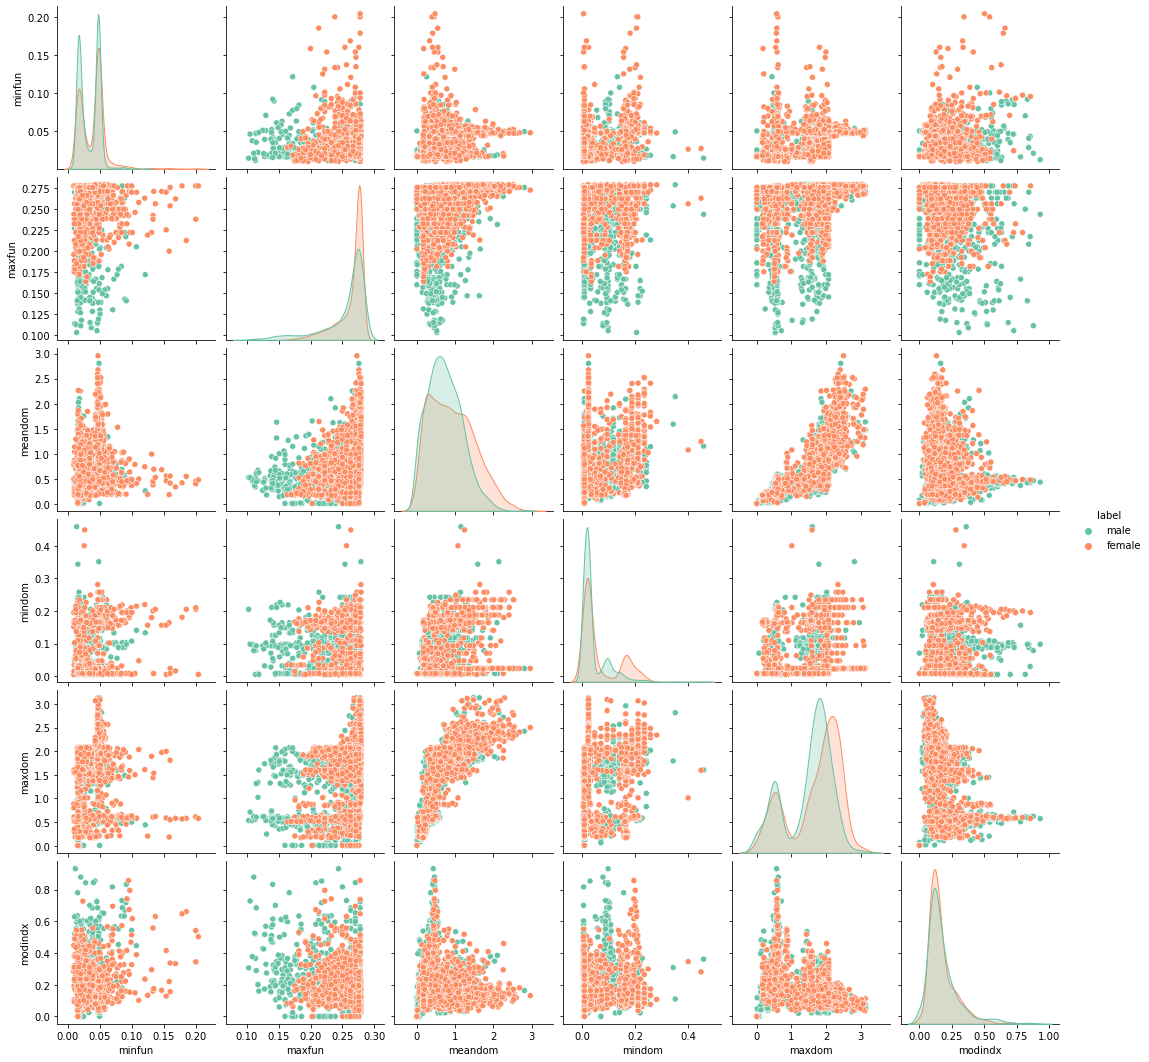

In [26]:
sns.pairplot(df,x_vars=list(df.columns[7:13]),y_vars=list(df.columns[7:13]), kind="scatter", hue="label", palette="Set2")
plt.show()

Wnioski jakie możemy wyciągnąć z wykresów:
+ Zmienne w większości przypadków nie przejawiają nawet nieliniowych zależności parami od siebie. Jedynymi parami podejrzanymi o to są **Q25** i **median** oraz **maxdom** i **meandom**.
+ Dodatkowo niezależność ta jest również pod warunkiem znajomości płci danej osoby.
+ Niektóre zmienne wydają się bardzo dobrze separować obie klasy, więc będzie nam zależało, żeby uwzglednić je w naszym modelu jako pierwsze. Są to na przykład: **meanfun**, **Q25**, **mode** i **sp.ent**.
+ Histogramy wszystkich zmiennych poza **mode** mają podobne kształty w przypadku kobiet i mężczyzn. W przypadku tej zmiennej rozkład **mode** dla obu płci ma zupełnie różne maksima, kształty oraz punkty koło których gromadziło się najwięcej obserwacji.

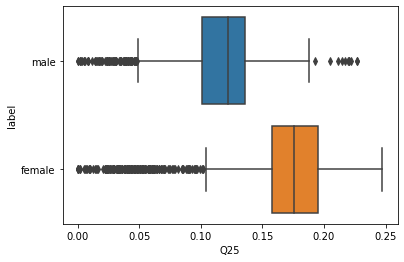

In [27]:
sns.boxplot(data=df,x="Q25",y="label")
plt.show()

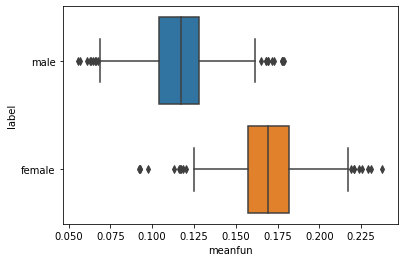

In [28]:
sns.boxplot(data=df,x="meanfun",y="label")
plt.show()

Histogramy warunkowane z przynależnością do płci pokazują ciekawą własność rozkładu zmiennej **mode**. Męskie głosy zdają się samotnie koncetrować wokół wartości 0.09. Możemy popatrzeć na przekształcenia tej zmiennej lub próby jej skategoryzowania.

In [29]:
df["mode_trans"] = np.abs(df["mode"] - 0.09)
df["mode_trans2"]=0
df.loc[list(np.where((df["mode"]>0.08) & (df["mode"]<0.15) )[0]),"mode_trans2"]=1
corr = df.loc[:,["mode","mode_trans2", "mode_trans", "gender"]].corr(method="kendall")
corr.style.background_gradient(cmap='coolwarm')

,mode,mode_trans2,mode_trans,gender
mode,1.000000,-0.338579,0.820747,0.115222
mode_trans2,-0.338579,1.000000,-0.517302,-0.403527
mode_trans,0.820747,-0.517302,1.000000,0.130781
gender,0.115222,-0.403527,0.130781,1.000000


Zmienna indykatorowa która jako warunek bierze obserwacje podzielone ze względu na zmienną **mode** w zależności do zawierania się wartości w przedziale od 0.08 do 0.15, a poza nim zdaje się mieć dużą moc deskryminacyjną w porównaniu do zwykłej monotonicznej zależności **mode** i płci mierzonej korelacją kendalla.

# Data preprocessing and feature engineering

Usunęliśmy już wcześniej kilka zmiennych, które według nas nie wnosiłyby nic do modelu, dla przypomnienia powtórzymy poprzednie usunięcia i transformacje oraz sprawdzimy czy możemy jakoś stransformować pozostałe zmienne.

In [204]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")

Zmienne dotychczas usunięte:

In [205]:
df1=df1.drop(columns=["IQR","centroid","dfrange","meanfreq","sfm","sd","skew"])

Dotychczasowe transformacje:

In [206]:
df1['kurt']=np.log(np.log(df1['kurt']))
df1['maxdom']=np.log(df1['maxdom']+1)

In [207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   median   3168 non-null   float64
 1   Q25      3168 non-null   float64
 2   Q75      3168 non-null   float64
 3   kurt     3168 non-null   float64
 4   sp.ent   3168 non-null   float64
 5   mode     3168 non-null   float64
 6   meanfun  3168 non-null   float64
 7   minfun   3168 non-null   float64
 8   maxfun   3168 non-null   float64
 9   meandom  3168 non-null   float64
 10  mindom   3168 non-null   float64
 11  maxdom   3168 non-null   float64
 12  modindx  3168 non-null   float64
 13  label    3168 non-null   object 
dtypes: float64(13), object(1)
memory usage: 346.6+ KB


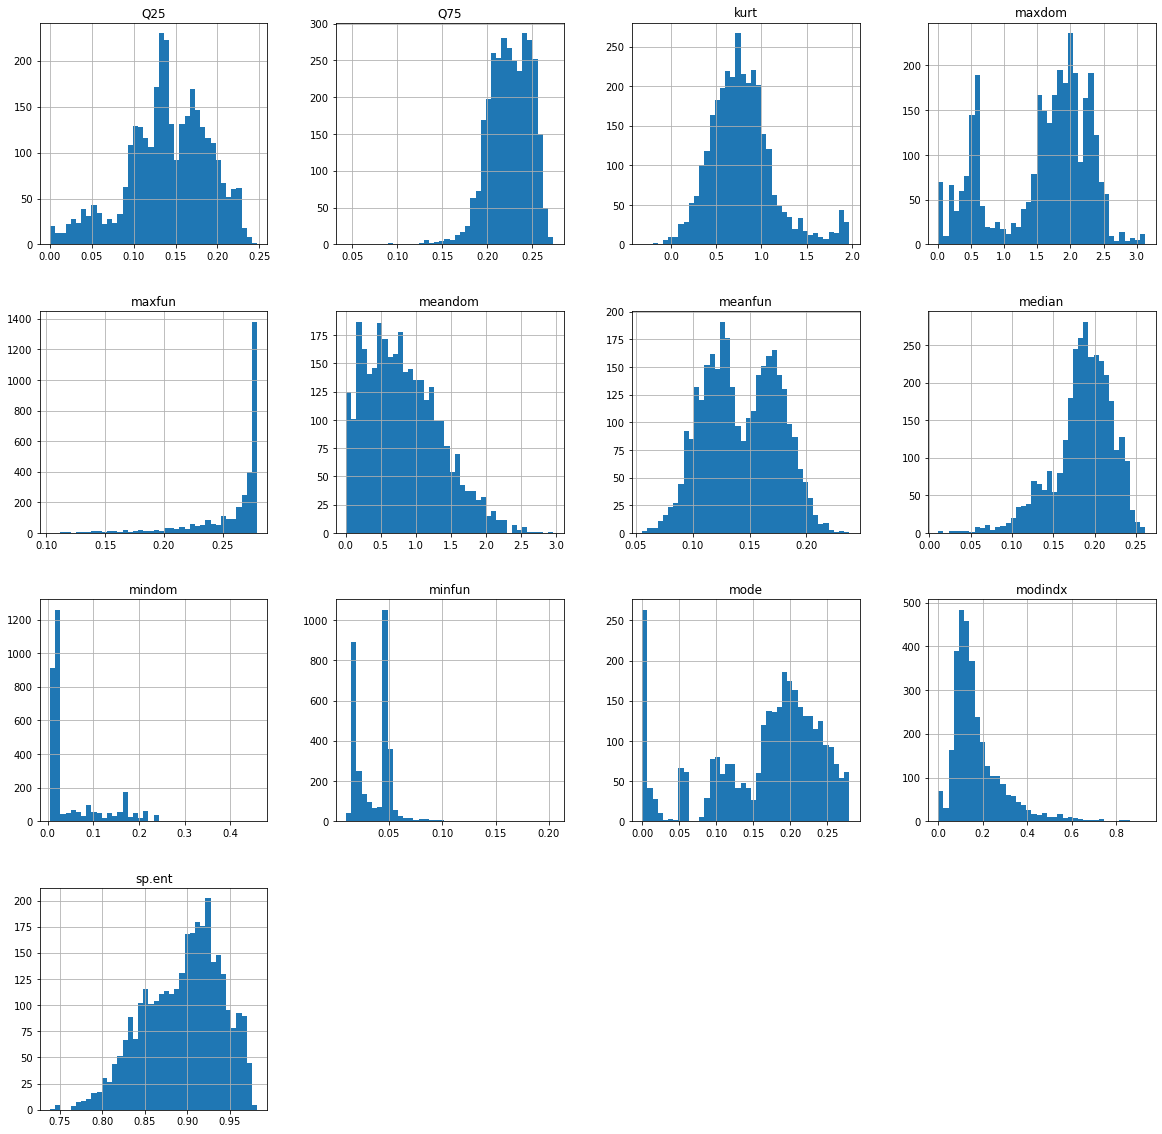

In [208]:
df1.hist(bins=40,figsize=(20,20))
plt.show()

Będziemy chcieli znaleźć jeszcze przekształcenia dla zmiennych **meandom** oraz **modindx**. 

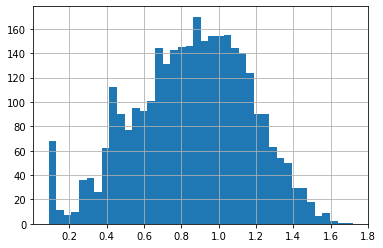

In [209]:
np.sqrt(df1["meandom"]).hist(bins=40)
plt.show()

In [210]:
df1["meandom"]=np.sqrt(df1["meandom"])

Okazuje się, że dobrym przekształceniem dla zmiennej **meandom** jest pierwiastek, wtedy rozkład ten staje się niemal symetryczny i przypomina nawet w pewnym sensie krzywą Gaussa. Martwi nas jedynie duży słupek w okolicach zera. Sprawdzimy czy nie jest to jedna wartość co wskazywałoby na to, że dane zostały w pewien sposób ucięte do tej wartości (np. była to minimalna czułość przyrządów pomiarowych).

In [211]:
df1["meandom"].value_counts()

0.088388    61
0.265165     4
0.847791     4
0.678924     4
0.441942     4
            ..
0.549239     1
0.969254     1
1.356673     1
1.021488     1
0.687500     1
Name: meandom, Length: 2999, dtype: int64

Dzieje się tak jak podejrzewaliśmy, jedna wartość powtarza się zbyt liczną ilość razy, uznamy ją zatem za wartość odstającą, gdyż może się okazać, że faktyczne wartości były dużo mniejsze niż wpisane. Dodatkowo widzimy, że odstaje ona bardzo dużo od rozkładu. Sprawdźmy tylko czy obserwacje te nie różnicują nam dobrze obu klas.

In [212]:
odstajace1 = np.where(df1["meandom"]==np.min(df1["meandom"]))
(df1["label"])[df1["meandom"]==np.min(df1["meandom"])].value_counts()

male      42
female    19
Name: label, dtype: int64

Taką różnicę w obu klasach jesteśmy jeszcze w stanie zaakceptować.

Przejdźmy teraz do zmiennej **modindx**. Okazuje się, że dobrym przekształceniem dla niej będzie log(x+1). Znowu jednak mamy wystający słupek histogramu przy zerze, musimy sprawdzić czy nie stało się tak jak w poprzednim przypadku, że jest tak tylko jedna wartość.

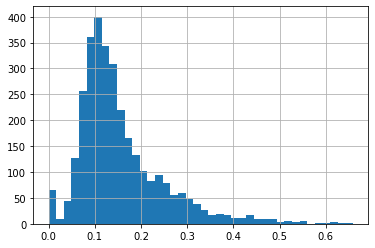

In [213]:
np.log(df1["modindx"]+1).hist(bins=40)
plt.show()

In [214]:
df1["modindx"].value_counts()

0.000000    65
0.133333     3
0.166667     3
0.200000     3
0.052632     3
            ..
0.087455     1
0.174607     1
0.288491     1
0.251960     1
0.380226     1
Name: modindx, Length: 3079, dtype: int64

Widzimy, że w tym przypadku najprowdobodobniej wartość zerowa ma zbyt dużą liczność, co może świadczyć o pewnym przycięciu pierwotnych obserwacji do 0, a co za tym idzie wpłynie to na poprawność naszego modelu. Obserwacje te będziemy, więc traktować jako odstające. Sprawdźmy jak poprzednio czy nie oddzielają nam one dobrze klas.

In [215]:
odstajace2 = np.where(df1["modindx"]==np.min(df1["modindx"]))
(df1["label"])[df1["modindx"]==np.min(df1["modindx"])].value_counts()

male      46
female    19
Name: label, dtype: int64

Nie jest to rażąca przewaga jednej z klas, więc możemy zaakceptować te obserwacje jako odstające.

W naszym zbiorze mamy sporo skośnych rozkładów, więc tam skrajne obserwacje wcale nie muszą być odstające, wynikają one raczej ze specyfiki rozkładów. Jedynymi pozostałymi zmiennymi gdzie możnaby zauważyć jakieś obserwacje odstające są zmienne **Q75** oraz **kurt**. **Q75** ma bardzo cienki ogon z lewej strony, za to brak go z prawej, dodatkowo jest to rozkład mocno skupiony na krótkim odcinku, stąd nasze podejrzenie. **kurt** ma z kolei bardzo dziwną "górkę" w histogramie z prawej strony, zupełnie nie pasuje ona do rozkładu. Sprawdźmy czy rozkłady te są w jakiś sposób normalne testem Shapiro-Wilka i czy możemy zastosować regułę 3 sigm.

In [216]:
scipy.stats.shapiro(df1["Q75"])

ShapiroResult(statistic=0.9543516635894775, pvalue=2.1591395600310518e-30)

In [217]:
scipy.stats.shapiro(df1["kurt"])

ShapiroResult(statistic=0.952728271484375, pvalue=7.620056553216739e-31)

Jak widać z p-wartości obu testów nie mamy żadnego prawa uznać je za normalne, posłużymy się jednak w pewien sposób nierównością Markowa. Z tego powodu wycentrujemy najpierw te zmienne.

In [218]:
E_Q75 = np.mean(df1["Q75"])
E_kurt = np.mean(df1["kurt"])
df1["Q75"]=df1["Q75"]-E_Q75
df1["kurt"]=df1["kurt"]-E_kurt

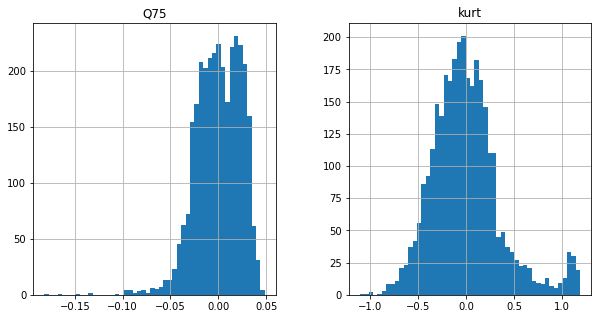

In [219]:
df1[["Q75","kurt"]].hist(bins=50,figsize=(10,5))
plt.show()

Chcemy sprawdzić czy odstające są obserwacje mniejsze od -0.07 dla **Q75** oraz większe od 1 dla **kurt**. Z nierówności Markowa wiemy, że $$\mathbb{P}(|X|>eps)\leq\frac{\mathbb{E}(X^2)}{eps^2}=\frac{Var(X)}{eps^2}=p_X$$

In [220]:
p_Q75 = np.var(df1["Q75"])/0.07**2
p_Q75

0.11400797631864766

In [221]:
p_kurt = np.var(df1["kurt"])/1
p_kurt

0.12885724864622636

Zatem tak się szacują prawdopodobieństwa, że wartości bezwzględne wychodzą poza te wartości. Nie są one może rzędu 0.05, należy jednak pamiętać, że jest to zazwyczaj dość grube oszacowanie i sporo zawyża faktyczną wartość prawdobodobieństwa. Na potwierdzenie nasze tezy możemy zobaczyć również boxploty dla obu zmiennych, które potwierdzą nam, że istnieją obserwcje odstające tam gdzie podejrzewaliśmy, a nawet są jeszcze bardziej rygorystyczne względem naszych wartości w przypadku **kurt**.

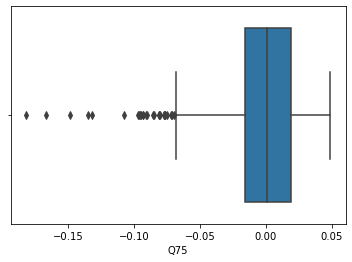

In [222]:
sns.boxplot(data=df1,x="Q75")
plt.show()

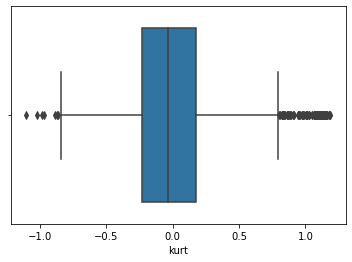

In [223]:
sns.boxplot(data=df1,x="kurt")
plt.show()

In [224]:
odstajace3 = np.where(np.abs(df1["Q75"])>0.07)
(df1["label"])[np.abs(df1["Q75"])>0.07].value_counts()

male      19
female     7
Name: label, dtype: int64

In [225]:
odstajace4 = np.where(np.abs(df1["kurt"])>1)
(df1["label"])[np.abs(df1["kurt"])>1].value_counts()

male      76
female    22
Name: label, dtype: int64

Sprawdźmy ile obserwacji łącznie uznaliśmy za odstające.

In [196]:
from functools import reduce
odstajace = reduce(np.union1d,(odstajace1[0],odstajace2[0],odstajace3[0],odstajace4[0]))

In [199]:
len(odstajace)

121

In [226]:
len(odstajace)/len(df1["label"])

0.03819444444444445

Mamy zatem zidentyfikowanych 121 obserwacji odstających, co stanowi niecałe 4% zbioru. Jest to jak najbardziej akceptowana liczba outlierów.

In [253]:
df1 = df1.loc[np.setdiff1d(np.array(np.array(df1.index).tolist()),np.array(odstajace.tolist())),:]

W kolejnym zbiorze danych, które chcemy przygotować przygotujemy więcej zmiennych jakościowych poprzez grupowanie niektórych ze zmiennych ilościowych. Przyjrzyjmy się tym zmiennym, które najbardziej nas interesują. Jako bazy użyjemy ramki danych z usuniętymi kolumnami podczas EDA.

In [270]:
df2 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")
df2=df2.drop(columns=["IQR","centroid","dfrange","meanfreq","sfm","sd","skew"])
df2['kurt']=np.log(np.log(df2['kurt']))
df2['maxdom']=np.log(df2['maxdom']+1)

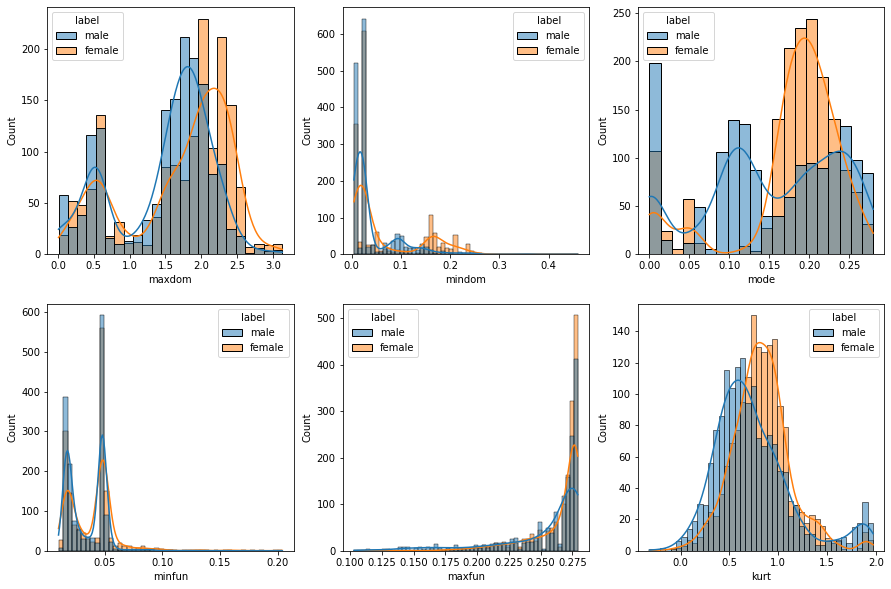

In [271]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data=df2, x="maxdom", kde=True,hue="label" , ax=axs[0, 0])
sns.histplot(data=df2, x="mindom", kde=True, hue="label", ax=axs[0, 1])
sns.histplot(data=df2, x="mode", kde=True, hue="label", ax=axs[0, 2])
sns.histplot(data=df2, x="minfun", kde=True, hue="label", ax=axs[1, 0])
sns.histplot(data=df2, x="maxfun", kde=True, hue="label", ax=axs[1,1])
sns.histplot(data=df2, x="kurt", kde=True, hue="label", ax=axs[1,2])

plt.show()

Zajmijmy się najpierw zmienną **minfun**. Możemy ją łatwo podzielić na dwie grupy, gdzie granicą między nimi będzie mniej więcej liczba 0.03.

In [278]:
df2["minfun_cat"]=0
df2.loc[df2["minfun"]>0.03,"minfun_cat"]=1

Podobnie można podzielić zmienną maxdom, tam również występują wyraźnie dwie górki, przy czym jedna z nich słabo rozdziela zmienna, za to druga wydaje się to robić bardzo dobrze. Granicą między nimi jest jedynka.

In [281]:
df2["maxdom_cat"]=0
df2.loc[df2["maxdom"]>1,"maxdom_cat"]=1

Przyjrzyjmy się teraz zmiennej **mindom**, która wykazuje silne tendencje dwumodalne.

In [280]:
df2["mindom"].value_counts()

0.023438    1246
0.007812     814
0.164062     109
0.054688      63
0.004883      61
            ... 
0.458984       1
0.219727       1
0.107666       1
0.027344       1
0.281250       1
Name: mindom, Length: 77, dtype: int64

Tak jak podejrzewaliśmy, dwie konkretne wartości wybijają się znacznie licznością ponad inne. Naszym pomysłem jest więc skategoryzowanie tej zmiennej na 3 klasy, 2 odpowiadające modom oraz 1 odpowiadającą pozostałym wartościom.

In [283]:
df2["mindom_cat"]=1
df2.loc[df2["mindom"]==df2["mindom"].value_counts().index[1],"mindom_cat"]=0
df2.loc[df2["mindom"]==df2["mindom"].value_counts().index[0],"mindom_cat"]=2

Wówczas proporcje tej zmiennej wynoszą:

In [284]:
df2["mindom_cat"].value_counts()

2    1246
1    1108
0     814
Name: mindom_cat, dtype: int64

Zmienną **mode** również będziemy chcieli przekształcić na 2 sposoby. Jest to motywowane tym, że wartości tej zmiennej dla kobiet i mężczyzn skupiają się w różnych punktach, jednak nie jest łatwo je rozdzielić na przykład na dwa rozłączne i spójne przedziały.

In [285]:
df2["mode_trans"] = np.abs(df2["mode"] - 0.09)
df2["mode_trans2"]=0
df2.loc[list(np.where((df2["mode"]>0.08) & (df2["mode"]<0.15) )[0]),"mode_trans2"]=1

Zmiennej **maxfun** nie chcemy jednak skategoryzować, ma ona osobliwy rozkład, mocno skośny, ale nie widać u niej jasnych przesłanek do kategoryzacji. Ostatnią zmienną, którą się zajmiemy będzie **kurt**, zastosujemy tu podobny schemat jak w przypadku **mode**.

In [286]:
df2["mode_kurt"] = np.abs(df2["kurt"] - 1.15)
df2["mode_kurt2"]=0
df2.loc[list(np.where((df2["kurt"]>0.7) & (df2["kurt"]<1.6) )[0]),"kurt_trans2"]=1

Pozostałe zmienne będziemy chcieli przeskalować minmaxem do przedziału (0,1)

In [287]:
mins=df2.iloc[:,0:13].apply(np.min,0)
maxs=df2.iloc[:,0:13].apply(np.max,0)

In [289]:
df2.iloc[:,0:13]=(df2.iloc[:,0:13]-mins)/(maxs-mins)